#Basemap
[Basemap](http://matplotlib.org/basemap/) je dio Matplotlib biblioteke s funkcijama i metodama za pravljenje geografskih karata. Korištenje Basemapa ilustrirat ćemo na nekim primjerima.

In [1]:
#osnovne biblioteke koje ćemo koristiti
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import numpy as np

##Crtanje najkraće udaljenosti

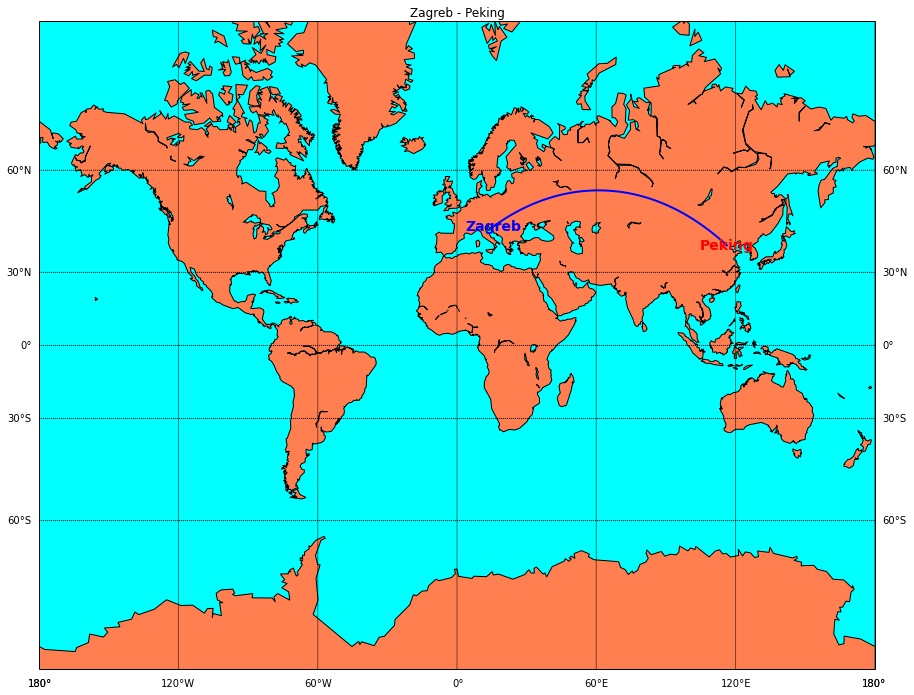

In [2]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
# Mercatorova projekcija
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# geografske koordinate Zagreba
zaglat = 45.48; zaglon = 15.58
# geografske koordinate Pekinga
pelat = 39.55; pelon = 116.25

m.drawgreatcircle(zaglon,zaglat,pelon,pelat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1,1,0,1])
zx,zy=m(zaglon,zaglat)
px,py=m(pelon,pelat)
ax.text(zx,zy,'Zagreb',fontsize=14,fontweight='bold',ha='center',va='center',color='b')
ax.text(px,py,'Peking',fontsize=14,fontweight='bold',ha='center',va='center',color='r')
ax.set_title('Zagreb - Peking');

## Dan i noć

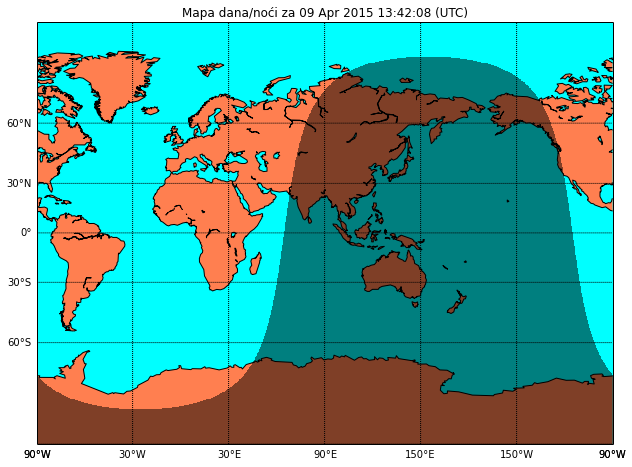

In [3]:
from datetime import datetime
# Millerova projekcija
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
map = Basemap(projection='mill',lon_0=90)

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')

date = datetime.utcnow()
CS=map.nightshade(date)
ax.set_title(u'Mapa dana/noći za %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"));

#Crtanje potresa

In [4]:
#Standardne biblioteke
from dateutil.tz import tzutc, tzlocal

#Ostalo što nam treba za crtanje
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

Podaci se dohvaćaju sa stranice [earthquake.usgs.gov](http://earthquake.usgs.gov/). Učitavamo datoteku `all_week.csv` u kojoj su dani podaci o zemljotresima u zadnjih tjedan dana. Datoteka se ažurira svakih 5 minuta.

In [5]:
#Parsiranje
import csv

lat, lon, mag = [], [], []
with open('all_week.csv', 'rb') as csvfile:
    reader = csv.DictReader(csvfile)
    for redak in reader:
        lon.append(float(redak['longitude']))
        lat.append(float(redak['latitude']))
        mag.append(float(redak['mag']))

In [6]:
#Normalizacija magnituda
norm = Normalize()
mag_norms = norm(np.array(mag))
z = (mag_norms * 10.0)**2.0

###Crtanje

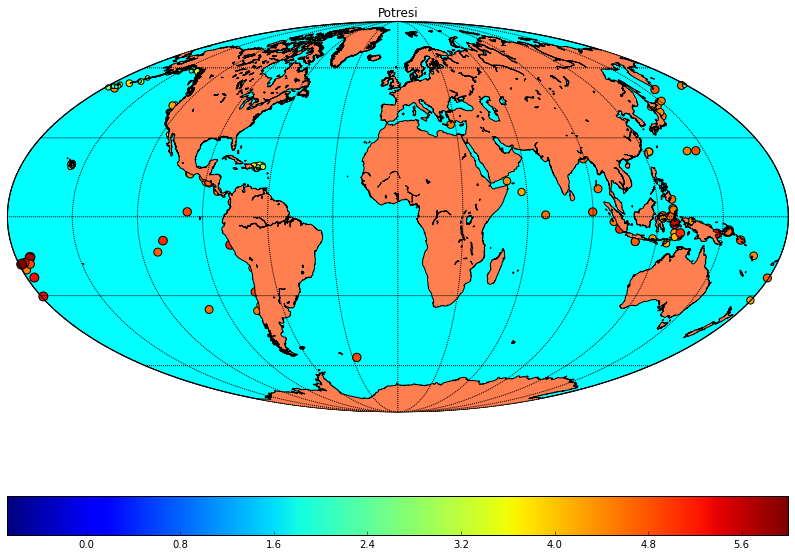

In [8]:
fig = plt.figure(figsize=(14,10))


m = Basemap(projection='moll', lat_0=0, lon_0=0, resolution='l', area_thresh=1000.0)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))
cmap = get_cmap('jet')
x,y = m(lon, lat)
sc = m.scatter(x, y, s=z, cmap=cmap, c=mag)
plt.colorbar(sc, orientation='horizontal')

plt.title("Potresi");

##Crtanje SST (sea surface temperature)
Podaci se preuzimaju sa stranice CISL Research Data Archive (http://rda.ucar.edu/). Podaci su u netCDF formatu, koji je u verziji 4 u biti podskup HDF formata (Hierarchical Data Format). Opis formata možete naći [ovdje](http://en.wikipedia.org/wiki/HDF5). 

Opis konkretnih podataka je [ovdje](http://rda.ucar.edu/datasets/ds277.7/docs/README.V2), a sami podaci se nalaze [ovdje](ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/NetCDF/2015/AVHRR/).

In [9]:
from netCDF4 import Dataset
f = Dataset('avhrr-only-v2.20150324.nc')

In [10]:
#Kako su strukturirani podaci 
print f

<type 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    Conventions: CF-1.0
    title: Daily-OI-V2, Final, Data (Ship, Buoy, AVHRR: NOAA19, METOP, NCEP-ice)
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (NetcdfCFWriter)
Original Dataset = /san/ftp/pub/oisst/NetCDF-uncompress/2015/AVHRR/avhrr-only-v2.20150324.nc; Translation Date = Wed Apr 08 13:42:14 EDT 2015
    creation_date: 2015-04-08 11:10
    Description: Reynolds, et al.(2007) Daily High-resolution Blended Analyses. Available at ftp://eclipse.ncdc.noaa.gov/pub/OI-daily/daily-sst.pdf  Climatology is based on 1971-2000 OI.v2 SST, Satellite data: Navy  NOAA19 METOP AVHRR, Ice data: NCEP ice
    Source: NOAA/National Climatic Data Center
    Contact: Dick Reynolds, email: Richard.W.Reynolds@noaa.gov & Chunying Liu, email: Chunying.liu@noaa.gov
    dimensions(sizes): time(1), zlev(1), lat(720), lon(1440)
    variables(dimensions): float32 sst(time,zlev,lat,lon), float32 time(tim

In [11]:
print(f.variables.keys()) # imena varijabli
temp = f.variables['sst']  # temperatura
print(temp)

[u'sst', u'time', u'zlev', u'lat', u'lon']
<type 'netCDF4.Variable'>
float32 sst(time, zlev, lat, lon)
    long_name: Daily sea surface temperature
    units: degrees C
    coordinates: time zlev lat lon lat lon
unlimited dimensions: 
current shape = (1, 1, 720, 1440)
filling off



In [12]:
temp.dimensions

(u'time', u'zlev', u'lat', u'lon')

In [13]:
data = temp[0,0]
data.shape

(720, 1440)

In [21]:
lonvals = f.variables['lon'][:]
latvals = f.variables['lat'][:]

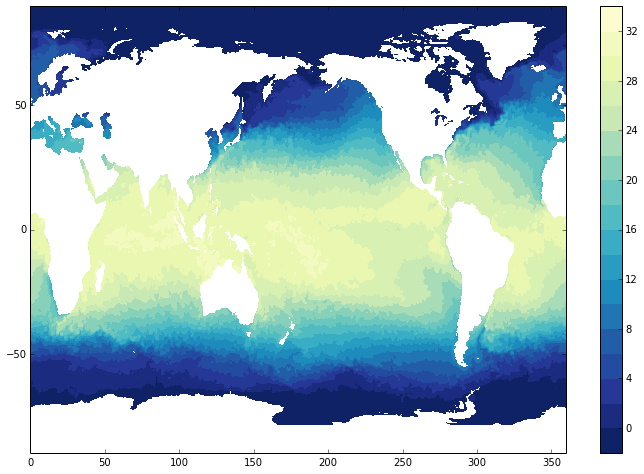

In [22]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.contourf(lonvals, latvals, data, 20, cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
plt.show()

Sad ćemo nacrati iste podatke na zemaljskoj kugli.

In [17]:
m = Basemap(projection='ortho', lon_0=-50, lat_0=40, resolution='l')

In [23]:
X,Y = np.meshgrid(lonvals, latvals)
x,y = m(X,Y)

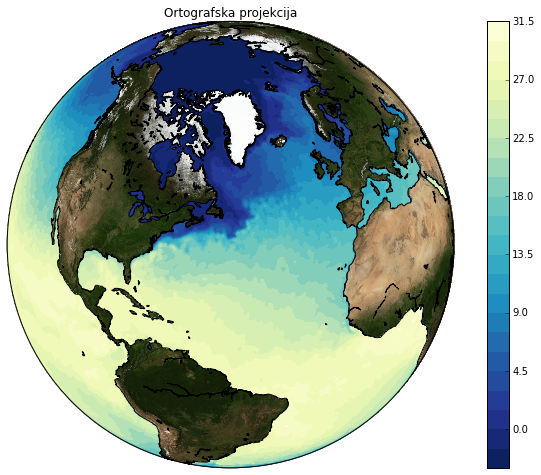

In [27]:
pc = m.contourf(x, y, data, 30, cmap=plt.get_cmap('YlGnBu_r'))
m.bluemarble()
m.drawmapboundary()
m.drawcoastlines()
plt.title('Ortografska projekcija')
plt.colorbar(pc, orientation='vertical')
plt.show()